Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
data = pd.read_csv(r'/content/healthcare-dataset-stroke-data.csv')

In [17]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Corr Plot

In [18]:
corr = data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


# Data Cleaning

In [19]:
data['bmi'].fillna((data['bmi'].mean()),inplace = True)

In [20]:
data.isnull().sum()/len(data)*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [21]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

In [22]:
data = data.drop(columns = ['id','gender','ever_married','work_type','Residence_type','hypertension','heart_disease','smoking_status'], axis =1)

In [23]:
data.head()

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.600000,1
1,61.0,202.21,28.893237,1
2,80.0,105.92,32.500000,1
3,49.0,171.23,34.400000,1
4,79.0,174.12,24.000000,1


# Outlier removing

In [24]:
def remove_outliers(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return upper_range,lower_range

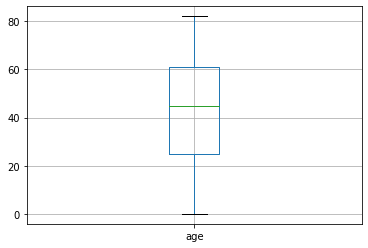

In [25]:
data.boxplot(column = ['age'])
plt.show()

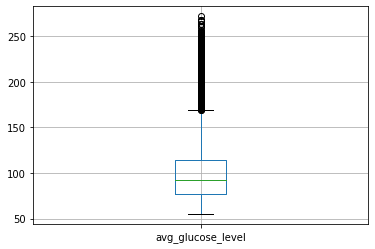

In [26]:
data.boxplot(column = ['avg_glucose_level'])
plt.show()

In [27]:
upper_bound,lower_bound = remove_outliers(data['avg_glucose_level'])
data['avg_glucose_level'] = np.where(data['avg_glucose_level']>=upper_bound,upper_bound,data['avg_glucose_level'])
data['avg_glucose_level'] = np.where(data['avg_glucose_level']<=lower_bound,lower_bound,data['avg_glucose_level'])

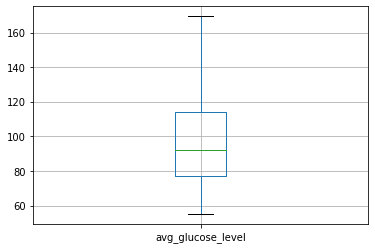

In [28]:
data.boxplot(column = ['avg_glucose_level'])
plt.show()

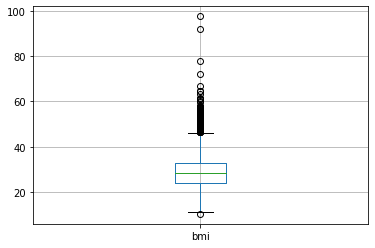

In [29]:
data.boxplot(column = ['bmi'])
plt.show()

In [30]:
upper_bound,lower_bound = remove_outliers(data['bmi'])
data['bmi'] = np.where(data['bmi']>=upper_bound,upper_bound,data['bmi'])
data['bmi'] = np.where(data['bmi']<=lower_bound,lower_bound,data['bmi'])

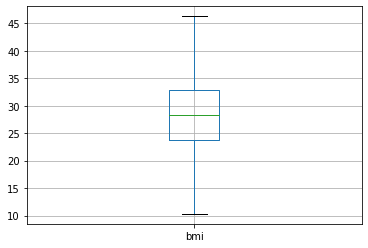

In [31]:
data.boxplot(column = ['bmi'])
plt.show()

# Train test split

In [32]:
X = data.drop('stroke',axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state= 101)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 3)
(4088,)
(1022, 3)
(1022,)


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lRpredict = clf.predict(X_test)

In [36]:
print(accuracy_score(y_test,lRpredict))
print(confusion_matrix(y_test,lRpredict))

0.9471624266144814
[[968   0]
 [ 54   0]]


In [37]:
print(classification_report(y_test,lRpredict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [38]:
Dic = DecisionTreeClassifier()
Dic.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
DTpredict = Dic.predict(X_test)

In [40]:
print(accuracy_score(y_test,DTpredict))
print(confusion_matrix(y_test,DTpredict))
print(classification_report(y_test,DTpredict))

0.9099804305283757
[[922  46]
 [ 46   8]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       968
           1       0.15      0.15      0.15        54

    accuracy                           0.91      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.91      0.91      0.91      1022



# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
RFpredict = model.predict(X_test)

In [43]:
print(accuracy_score(y_test,RFpredict))
print(confusion_matrix(y_test,RFpredict))
print(classification_report(y_test,RFpredict))

0.9452054794520548
[[963   5]
 [ 51   3]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.38      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.66      0.53      0.53      1022
weighted avg       0.92      0.95      0.93      1022



# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [45]:
KNN_pred=knn.predict(X_test)

In [46]:
print(accuracy_score(y_test,KNN_pred))
print(confusion_matrix(y_test,KNN_pred))
print(classification_report(y_test,KNN_pred))

0.9422700587084148
[[962   6]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       968
           1       0.14      0.02      0.03        54

    accuracy                           0.94      1022
   macro avg       0.55      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



In [47]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
SV_pred=sv.predict(X_test)

In [49]:
print(accuracy_score(y_test,SV_pred))
print(confusion_matrix(y_test,SV_pred))
print(print(classification_report(y_test,SV_pred)))

0.9471624266144814
[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022

None


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
